#AY 119 HW 1

Mount google drive

In [1]:
import os
from google.colab import drive   

drive.flush_and_unmount()
# mount the google drive to my Colab session
drive.mount('/content/gdrive')
# use the google drive in my Colab session
home_path = '/content/gdrive/My Drive/AY119'
print(os.listdir(home_path))

Mounted at /content/gdrive
['data']


Set up data path and load features

In [2]:
import sys
# datapath is the path to the data npy file for this assignment
datapath = os.path.join(home_path, 'data/dsfp_ztf_feats.npy')
sys.path.insert(1, datapath)

In [3]:
import numpy as np
# load features from datapath into numpy
feats = np.load(datapath)
print(feats)

[[1.72818508e+01 1.75515671e+01 1.65696695e-01 ... 2.45821470e+06
  5.22394562e+00 0.00000000e+00]
 [2.03205700e+01 2.08020535e+01 1.95894212e-01 ... 2.45821985e+06
  5.51870108e+00 0.00000000e+00]
 [2.04277248e+01 2.09223328e+01 2.00625002e-01 ... 2.45821985e+06
  5.85641098e+00 0.00000000e+00]
 ...
 [2.11532211e+01 1.98009758e+01 2.08727643e-01 ... 2.45839065e+06
  7.55207109e+00 0.00000000e+00]
 [2.06950302e+01 1.97840366e+01 1.48797214e-01 ... 2.45839068e+06
  8.50300980e+00 0.00000000e+00]
 [2.06728306e+01 2.00290928e+01 1.62722468e-01 ... 2.45839068e+06
  9.20202923e+00 0.00000000e+00]]


Assign column names to features within DataFrame object

In [4]:
COL_NAMES = ['diffmaglim', 'magpsf', 'sigmapsf', 'chipsf', 'magap', 'sigmagap',
             'distnr', 'magnr', 'sigmagnr', 'chinr', 'sharpnr', 'sky',
             'magdiff', 'fwhm', 'classtar', 'mindtoedge', 'magfromlim', 'seeratio',
             'aimage', 'bimage', 'aimagerat', 'bimagerat', 'elong', 'nneg',
             'nbad', 'ssdistnr', 'ssmagnr', 'sumrat', 'magapbig', 'sigmagapbig',
             'ndethist', 'ncovhist', 'jdstarthist', 'jdendhist', 'scorr', 'label']

In [5]:
import pandas as pd
# create dataframe with feats assigned columns given by COL_NAMES
df = pd.DataFrame(data=feats, columns=COL_NAMES)
# print(df.head(5))

In [6]:
df

,diffmaglim,magpsf,sigmapsf,chipsf,magap,sigmagap,distnr,magnr,sigmagnr,chinr,sharpnr,sky,magdiff,fwhm,classtar,mindtoedge,magfromlim,seeratio,aimage,bimage,aimagerat,bimagerat,elong,nneg,nbad,ssdistnr,ssmagnr,sumrat,magapbig,sigmagapbig,ndethist,ncovhist,jdstarthist,jdendhist,scorr,label
0,17.281851,17.551567,0.165697,0.617023,17.300800,0.2021,-999.000000,-999.000000,-999.000,-999.000,-999.000,18.749269,-0.250767,2.92000,1.000,445.491699,-0.018949,0.975987,1.545,1.117,0.529110,0.382534,1.383169,3.0,5.0,-999.0,-999.0,0.809352,16.575399,0.2297,1.0,54.0,2.458215e+06,2.458215e+06,5.223946,0.0
1,20.320570,20.802053,0.195894,1.262091,20.366100,0.2053,8.082719,23.323999,0.351,0.744,-0.099,1.064578,-0.435954,2.54000,0.407,394.476410,-0.045530,1.133286,1.639,1.380,0.645276,0.543307,1.187681,3.0,0.0,-999.0,-999.0,1.000000,19.654600,0.2366,1.0,60.0,2.458220e+06,2.458220e+06,5.518701,0.0
2,20.427725,20.922333,0.200625,1.322061,20.233700,0.1664,9.313808,23.226999,0.332,0.681,-0.388,0.764392,-0.688633,5.20000,0.571,161.064301,0.194025,0.550181,2.911,2.027,0.559808,0.389808,1.436113,2.0,0.0,-999.0,-999.0,1.000000,19.508101,0.1896,1.0,51.0,2.458220e+06,2.458220e+06,5.856411,0.0
3,20.427725,20.703472,0.172896,1.431551,20.347000,0.1857,3.687793,20.256001,0.065,2.594,0.184,0.726385,-0.356472,4.15000,0.589,149.032303,0.080725,0.689383,2.014,1.467,0.485301,0.353494,1.372870,2.0,4.0,-999.0,-999.0,0.988251,19.627600,0.2118,1.0,51.0,2.458220e+06,2.458220e+06,5.573197,0.0
4,20.427725,20.704222,0.171942,1.341425,20.474501,0.2077,3.520936,21.767000,0.097,0.903,0.148,1.175698,-0.229722,4.66000,0.882,435.422913,-0.046775,0.613936,2.387,1.715,0.512232,0.368026,1.391837,4.0,0.0,-999.0,-999.0,0.938757,19.993799,0.2958,1.0,51.0,2.458220e+06,2.458220e+06,6.145004,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,20.448118,17.893902,0.137054,17.172440,17.895201,0.0504,0.317832,15.811000,0.019,1.046,0.045,0.058492,0.001299,1.20654,0.983,814.342712,2.552919,2.000000,0.767,0.608,0.635702,0.503920,1.261513,6.0,0.0,-999.0,-999.0,0.962659,17.888500,0.0588,12.0,67.0,2.458309e+06,2.458390e+06,5.236978,0.0
3186,20.817453,19.790672,0.179343,8.860709,19.420900,0.1340,2.760423,19.268000,0.113,6.387,0.519,-0.193181,-0.369773,2.98000,0.976,72.594803,1.396553,0.782059,0.657,0.614,0.220470,0.206040,1.070033,8.0,0.0,-999.0,-999.0,0.660984,19.520800,0.1836,3.0,11.0,2.458370e+06,2.458391e+06,14.190198,0.0
3187,21.153221,19.800976,0.208728,5.876659,20.515400,0.2529,1.422600,19.018000,0.059,2.474,0.263,2.334778,0.714424,1.60000,0.895,275.130615,0.637822,1.575380,0.777,0.664,0.485625,0.415000,1.170181,5.0,0.0,-999.0,-999.0,0.999012,19.728800,0.1553,14.0,139.0,2.458343e+06,2.458391e+06,7.552071,0.0
3188,20.695030,19.784037,0.148797,1.928423,19.771999,0.1807,6.561678,20.098000,0.043,0.863,-0.003,1.306467,-0.012036,2.70000,0.963,800.030212,0.923030,0.921416,0.822,0.700,0.304444,0.259259,1.174286,5.0,0.0,-999.0,-999.0,0.952918,19.594101,0.2094,16.0,104.0,2.458321e+06,2.458391e+06,8.503010,0.0


In [7]:
# df['diffmaglim'].to_numpy()
# ax = plt.gca()
# df.plot(kind='scatter',x='diffmaglim',y='chipsf',ax=ax)
# plt.show()

Plotting functions for visualization

In [8]:
import matplotlib.pyplot as plt

def plot_features_pairwise_from_df(df, x_feat_name, y_feat_name):
    '''
    Takes the dataframe df, gets the numpy form of the x and y features based on 
    x_feat_name and y_feat_name, and then plots them against each other
    using matplotlib pyplot's scatterplot
    '''
    x = df[x_feat_name].to_numpy()
    y = df[y_feat_name].to_numpy()

    plt.figure(figsize=(8, 6), dpi=100)
    plt.scatter(x, y)
    plt.xlabel(x_feat_name)
    plt.ylabel(y_feat_name)
    # plt.legend(loc='upper right')
    plt.title("{} vs. {}".format(y_feat_name, x_feat_name))
    plt.show()

def plot_features_from_df(df, feats):
    '''
    Takes the dataframe df, gets the numpy form of the features in feats
    and then plots them using matplotlib pyplot's line plot
    '''
    plt.figure(figsize=(8, 6), dpi=100)

    for feat in feats:
        y = df[feat].to_numpy()
        x = np.arange(1, len(y)+1)
        plt.scatter(x, y, label=feat)

    plt.xlabel('sample')
    # plt.ylabel('')
    plt.legend(loc='upper right')
    # plt.title()
    plt.show()

Sample plots. These aren't very illuminating because I don't understand the meaning behind these variables, but they demonstrate the plots work

In [9]:
# plot_features_from_df(df, ['fwhm', 'magpsf'])

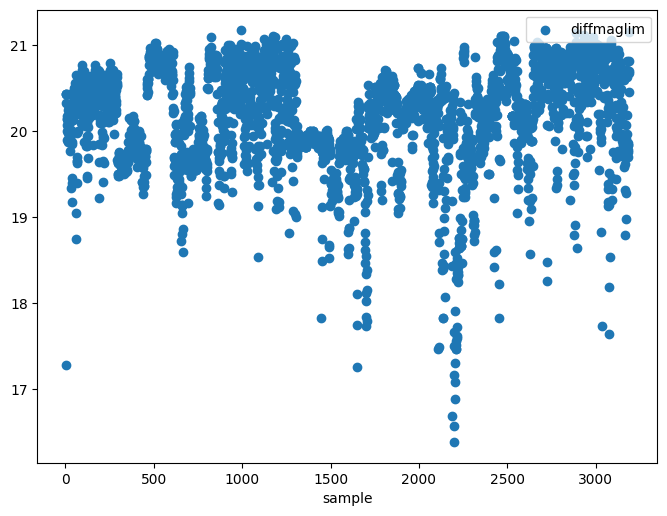

In [10]:
plot_features_from_df(df, ['diffmaglim'])

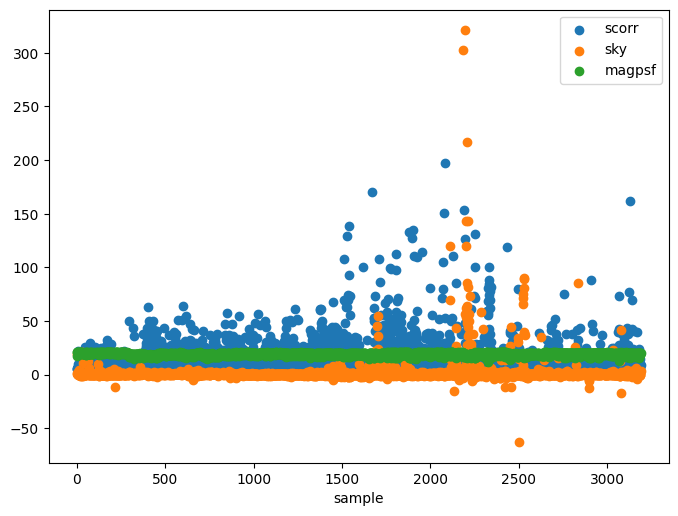

In [11]:
plot_features_from_df(df, ['scorr', 'sky', 'magpsf'])

Pairwise feature plots, where we plot one feature against another in a scatter plot.

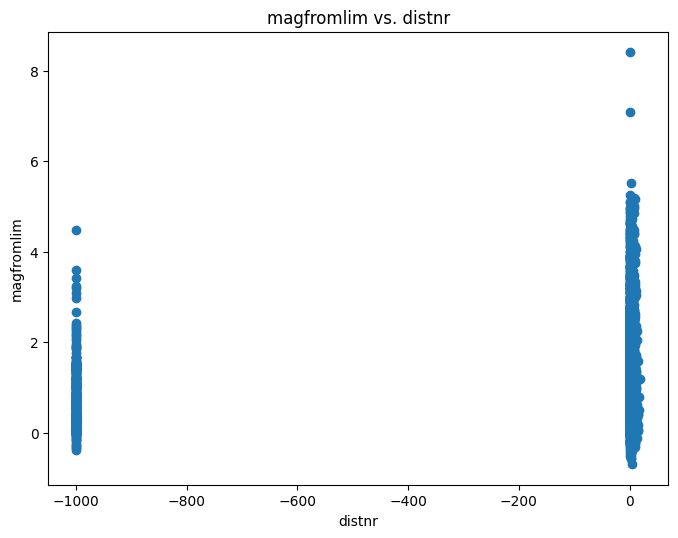

In [12]:
plot_features_pairwise_from_df(df, 'distnr', 'magfromlim')

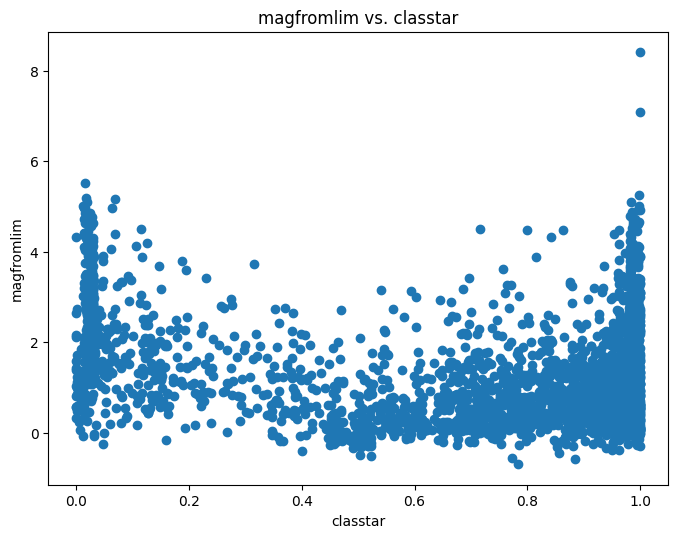

In [13]:
plot_features_pairwise_from_df(df, 'classtar', 'magfromlim')

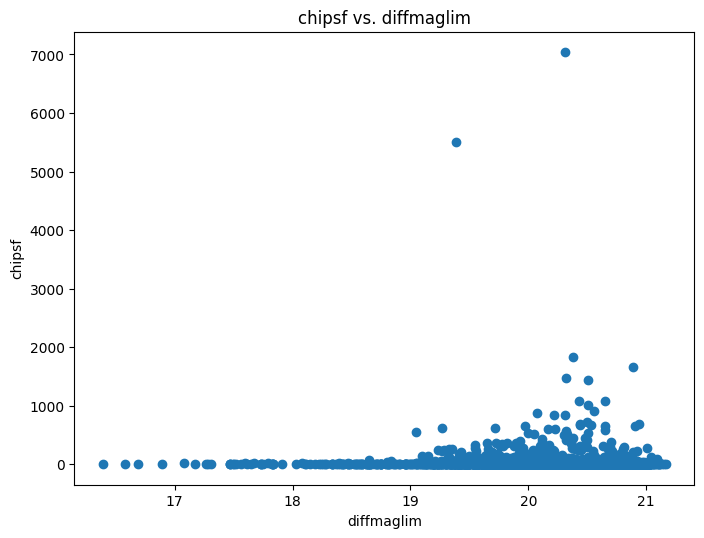

In [14]:
plot_features_pairwise_from_df(df, 'diffmaglim', 'chipsf')

Create and show covariance matrix among the features

In [15]:
# get covariance matrix covMatrix directly from pandas Dataframe
covMatrix = pd.DataFrame.cov(df)
covMatrix

,diffmaglim,magpsf,sigmapsf,chipsf,magap,sigmagap,distnr,magnr,sigmagnr,chinr,sharpnr,sky,magdiff,fwhm,classtar,mindtoedge,magfromlim,seeratio,aimage,bimage,aimagerat,bimagerat,elong,nneg,nbad,ssdistnr,ssmagnr,sumrat,magapbig,sigmagapbig,ndethist,ncovhist,jdstarthist,jdendhist,scorr,label
diffmaglim,0.360484,0.256572,0.002627,-0.184555,0.279541,0.003352,-7.276704,-7.210780,-7.020165,-7.316514,-7.021044,-2.484739,0.022970,-0.819982,-0.011693,4.696228,0.080943,0.334689,-0.157351,-0.121707,0.285059,0.291075,-0.010306,0.154466,-0.198490,-4.013601,-4.016726,0.000306,0.318967,-0.001917,0.188559,2.061978,4.593245,8.724785,-0.082333,0.034261
magpsf,0.256572,1.397656,0.044371,-79.524802,1.290493,0.066460,-75.294166,-75.466278,-75.306150,-76.391286,-75.340632,-2.518573,-0.107163,-3.191249,0.017632,-17.205298,-1.033921,-12.781075,-0.317205,-0.241207,-12.884607,-12.909774,-0.010330,0.949272,-0.359073,-21.121223,-21.161426,-0.009232,1.259406,0.085782,-3.010178,12.437551,2.464832,-1.248331,-9.663816,-0.009063
sigmapsf,0.002627,0.044371,0.003556,-1.862123,0.045526,0.004090,0.016822,0.046296,0.017946,-0.042291,0.015953,-0.039695,0.001155,-0.199050,0.005436,-1.324123,-0.042899,-0.298706,-0.022570,-0.015600,-0.310907,-0.312572,-0.002306,0.066267,-0.035288,-3.797124,-3.795908,-0.001409,0.048490,0.004548,-0.040270,1.321528,1.208859,1.159150,-0.471641,0.001093
chipsf,-0.184555,-79.524802,-1.862123,34111.718618,-76.756246,-2.813938,1647.392504,1613.266893,1642.294121,1697.765341,1643.077621,8.074275,2.768557,271.749034,-4.856055,2026.652823,76.571689,423.804255,31.576152,21.519564,432.503954,433.124482,3.372949,-38.106718,23.716691,324.660568,324.491133,0.065610,-83.719884,-3.763796,145.487253,67.790706,-727.750423,-390.528998,938.122145,-4.558320
magap,0.279541,1.290493,0.045526,-76.756246,1.313822,0.075366,-43.191835,-42.875272,-43.128631,-44.293494,-43.160085,-2.517517,0.023329,-3.880645,0.061062,-15.868678,-1.034281,-11.427063,-0.479136,-0.350379,-11.584028,-11.603426,-0.034299,1.131744,-0.473047,-48.363975,-48.360013,-0.015190,1.322607,0.093074,-2.283412,15.816637,8.992177,7.244004,-10.223764,0.035961
sigmagap,0.003352,0.066460,0.004090,-2.813938,0.075366,0.008178,1.441098,1.526224,1.447076,1.392599,1.446175,-0.012136,0.008906,-0.271217,0.007930,-1.264760,-0.072014,-0.210948,-0.037276,-0.025663,-0.226409,-0.227478,-0.004356,0.098087,-0.044484,-4.907453,-4.906417,-0.001646,0.076919,0.008976,-0.073929,2.352523,1.702514,1.570161,-0.649553,0.005752
distnr,-7.276704,-75.294166,0.016822,1647.392504,-43.191835,1.441098,80947.563180,82229.750502,80702.419413,80936.168055,80703.805216,84.057366,32.102339,-170.866776,16.585374,4791.126215,35.915125,476.130735,-47.451795,-25.075042,438.561893,439.587912,-15.646803,13.164200,-73.883276,5680.175039,5674.502732,-0.168810,-19.579596,0.934611,327.572892,1122.684691,2300.829550,3540.313500,164.237341,21.951990
magnr,-7.210780,-75.466278,0.046296,1613.266893,-42.875272,1.526224,82229.750502,83540.579000,81986.172259,82221.691824,81987.597146,83.918583,32.591013,-175.320691,16.944938,4847.500825,35.664486,483.927641,-48.310708,-25.442086,445.458628,446.500828,-16.022845,13.789699,-76.358627,5683.631144,5678.059756,-0.139019,-18.846077,1.032169,334.940714,1158.179598,2340.684035,3611.680373,163.662716,22.600234
sigmagnr,-7.020165,-75.306150,0.017946,1642.294121,-43.128631,1.447076,80702.419413,81986.172259,80465.779878,80698.284373,80467.332057,84.636265,32.177526,-173.389035,16.733052,4787.451835,36.108460,466.257864,-47.750678,-25.229455,428.362123,429.419250,-15.770311,13.185030,-75.049739,5549.748834,5544.240468,-0.138947,-19.331810,0.936334,333.741265,1108.954333,2311.285549,3572.233581,159.981687,22.342669
chinr,-7.316514,-76.391286,-0.042291,1697.765341,-44.293494,1.392599,80936.168055,82221.691824,80698.284373,80947.275032,80700.101059,89.630059,32.097799,-165.956687,16.499633,4843.770947,36.976974,486.496011,-47.119719,-24.868056,448.983956,450.076262,-15.652507,11.387708,-73.161434,5792.632859,5786.7824

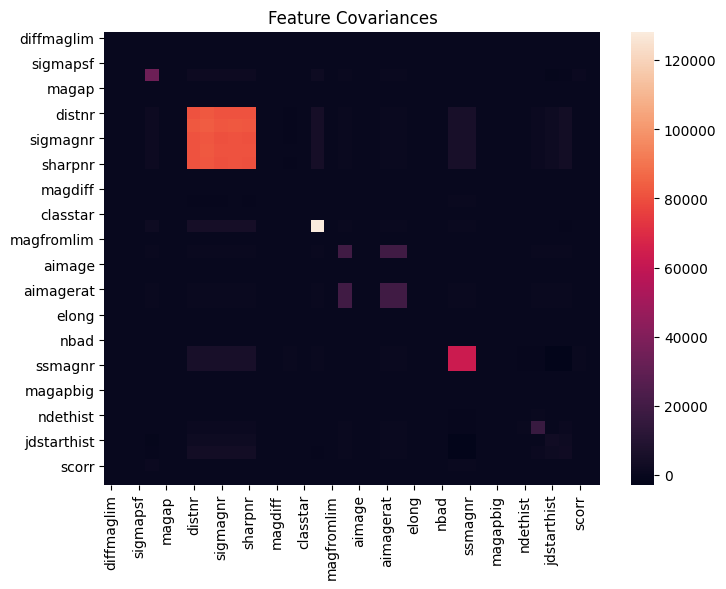

In [16]:
import seaborn as sn

#plot the covariance matrix covMatrix
plt.figure(figsize=(8, 6), dpi=100)
sn.heatmap(covMatrix, annot=False, fmt='.2g')
plt.title('Feature Covariances')
plt.show()

##Multi-dimensional Analysis

In [17]:
# Examining the labels column, we see the labels are binary, and the
# frequencies of 0 and 1 are printed in the cell output below
df['label'].value_counts()

0.0    2349
1.0     841
Name: label, dtype: int64

In [18]:
y = df['label']
# get all feature, leaving out label column
X = df.loc[:, :'scorr']

# print(y)
# print(X)

In [42]:
def plot_feature_pair_by_label(X, y, feat_x, feat_y, axes_labels=True):
    '''
    Plot scatter plots by label separately
    X: features dataframe
    y: labels
    feat_x: feature to be plotted on x axis
    feat_y: feature to be plotted on y axis
    '''
    plt.figure(figsize=(8, 6), dpi=100)
    plt.scatter(X[y==0][feat_x], X[y==0][feat_y], label='label 0', c='red', alpha=0.6)
    plt.scatter(X[y==1][feat_x], X[y==1][feat_y], label='label 1', c='blue', alpha=0.6)

    plt.legend()

    if axes_labels:
        plt.xlabel(feat_x)
        plt.ylabel(feat_y)

    plt.show()

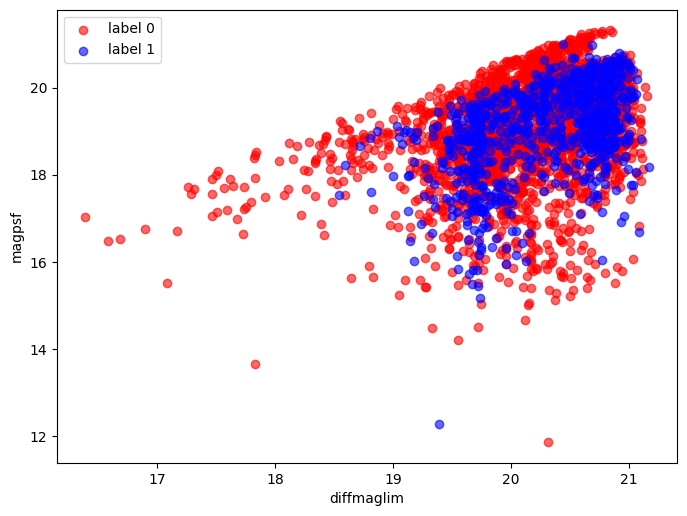

In [43]:
plot_feature_pair_by_label(X, y, 'diffmaglim', 'magpsf')

Feature scaling to normalize data

In [31]:
from sklearn.preprocessing import StandardScaler

# Standard Scaler subtracts mean and divides by standard deviation
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled

,diffmaglim,magpsf,sigmapsf,chipsf,magap,sigmagap,distnr,magnr,sigmagnr,chinr,sharpnr,sky,magdiff,fwhm,classtar,mindtoedge,magfromlim,seeratio,aimage,bimage,aimagerat,bimagerat,elong,nneg,nbad,ssdistnr,ssmagnr,sumrat,magapbig,sigmagapbig,ndethist,ncovhist,jdstarthist,jdendhist,scorr
0,-4.780977,-1.258164,0.855019,-0.154628,-1.379912,0.760082,-3.211080,-3.211133,-3.211239,-3.210924,-3.211238,1.425297,-0.260914,-0.351756,0.797228,-0.251824,-1.220435,0.142659,0.072032,-0.004027,0.143863,0.143407,0.451136,-0.266104,2.252946,-0.264097,-0.264105,-1.431363,-1.548453,0.447186,-0.382114,-0.278395,-0.532102,-1.052848,-0.627994
1,0.280946,1.491733,1.361527,-0.151135,1.294774,0.795474,0.329149,0.326460,0.312312,0.303513,0.310657,-0.058278,-0.773640,-0.398776,-0.969654,-0.394296,-1.245610,0.143781,0.141189,0.239132,0.144692,0.144554,-0.385856,-0.266104,-0.446865,-0.264097,-0.264105,0.611659,0.878529,0.500810,-0.382114,-0.232173,-0.441786,-0.949273,-0.609297
2,0.459446,1.593489,1.440878,-0.150810,1.179245,0.365240,0.333477,0.326125,0.312245,0.303292,0.309638,-0.083461,-1.473234,-0.069631,-0.481005,-1.046153,-1.018731,0.139624,1.077015,0.837320,0.144082,0.143459,0.677816,-0.644894,-0.446865,-0.264097,-0.264105,0.611659,0.763060,0.135546,-0.382114,-0.301506,-0.441786,-0.949273,-0.587876
3,0.459446,1.408333,0.975769,-0.150217,1.278108,0.578698,0.313699,0.315844,0.311303,0.310017,0.311654,-0.086649,-0.553579,-0.199557,-0.427373,-1.079755,-1.126036,0.140616,0.417081,0.319568,0.143551,0.143200,0.407039,-0.644894,1.712984,-0.264097,-0.264105,0.485751,0.857247,0.308075,-0.382114,-0.301506,-0.441786,-0.949273,-0.605840
4,0.459446,1.408968,0.959771,-0.150705,1.389361,0.822018,0.313113,0.321073,0.311416,0.304072,0.311528,-0.048956,-0.202647,-0.136450,0.445639,-0.279943,-1.246788,0.140078,0.691502,0.548858,0.143743,0.143304,0.488247,0.112687,-0.446865,-0.264097,-0.264105,-0.044629,1.145880,0.960886,-0.382114,-0.301506,-0.441786,-0.949273,-0.569570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,0.493417,-0.968550,0.374594,-0.064977,-0.861256,-0.917722,0.301853,0.300463,0.311141,0.304575,0.311164,-0.142679,0.436982,-0.563777,0.746575,0.778277,1.215331,0.149960,-0.500351,-0.474626,0.144624,0.144273,-0.069741,0.870269,-0.446865,-0.264097,-0.264105,0.211505,-0.513486,-0.880974,0.246443,-0.178248,1.116323,2.463992,-0.627167
3186,1.108658,0.636109,1.083905,-0.109987,0.470022,0.006895,0.310439,0.312425,0.311473,0.323350,0.312836,-0.163792,-0.590405,-0.344331,0.725718,-1.293224,0.120160,0.141277,-0.581280,-0.469079,0.141661,0.142148,-0.889575,1.627851,-0.446865,-0.264097,-0.264105,-3.021312,0.773069,0.088917,-0.267831,-0.609651,2.186390,2.484489,-0.059250
3187,1.667983,0.644826,1.576785,-0.126146,1.425048,1.321931,0.305736,0.311560,0.311282,0.309595,0.311933,0.048279,2.411413,-0.515091,0.484373,-0.727596,-0.598420,0.146933,-0.492994,-0.422851,0.143553,0.143639,-0.460786,0.491478,-0.446865,-0.264097,-0.264105,0.601068,0.937012,-0.131018,0.360726,0.376412,1.712363,2.484499,-0.480317
3188,0.904725,0.630495,0.571561,-0.147527,0.776380,0.523398,0.323802,0.315297,0.311226,0.303932,0.310995,-0.037986,0.400062,-0.378978,0.686984,0.738306,-0.328305,0.142270,-0.459887,-0.389567,0.142260,0.142527,-0.443209,0.491478,-0.446865,-0.264097,-0.264105,0.107114,0.830844,0.289423,0.475009,0.106786,1.329033,2.485050,-0.419998


PCA: Principal Component Analysis

In [32]:
from sklearn.decomposition import PCA

# PCA with 2 components --> two dimmensions of interest
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

X_pca

,0,1
0,1.368239,6.362349
1,-1.888728,0.624308
2,-0.988721,0.911597
3,-1.150318,0.775884
4,-2.105511,0.568492
...,...,...
3185,-0.273295,-1.937919
3186,-2.974197,-1.070767
3187,-3.681269,-1.223716
3188,-2.645510,-1.074898


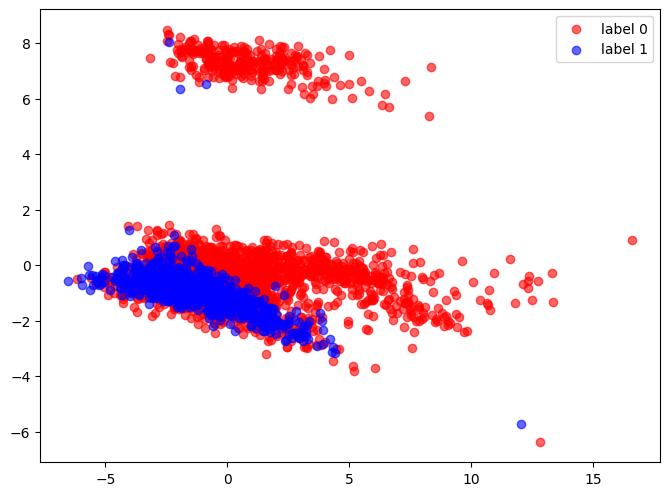

In [44]:
plot_feature_pair_by_label(X_pca, y, 0, 1, axes_labels=False)

LDA: Linear Discriminant Analysis

In [24]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# # PCA with 2 components --> two dimmensions of interest
# lda = LDA(n_components=2)
# X_lda = pd.DataFrame(lda.fit_transform(X_scaled, y))

# X_lda

In [25]:
# plot_feature_pair_by_label(X_lda, y, 0, 1)

3D Plots

In [40]:
import plotly
import plotly.graph_objs as go

#marker color represents color by label
markercolor = df['label'] # = y

fig = go.Scatter3d(x=X_scaled['diffmaglim'],
                    y=X_scaled['magpsf'],
                    z=X_scaled['scorr'],
                    marker=dict(color=markercolor,
                                opacity=0.6,
                                reversescale=False,
                                colorscale='viridis',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

mylayout = go.Layout(scene=dict(xaxis=dict( title="diffmaglim"),
                                yaxis=dict( title="magpsf"),
                                zaxis=dict(title="scorr")),)

plotly.offline.iplot({"data": [fig],
                     "layout": mylayout})


In [41]:
# PCA with 3 components --> 3 dimmensions of interest
pca3 = PCA(n_components=3)
X_pca3 = pd.DataFrame(pca3.fit_transform(X_scaled))


#Set marker properties
markercolor = df['label'] # = y

#Make Plotly figure
fig1 = go.Scatter3d(x=X_pca3[0],
                    y=X_pca3[1],
                    z=X_pca3[2],
                    marker=dict(color=markercolor,
                                opacity=0.6,
                                reversescale=False,
                                colorscale='viridis',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="PCA 1"),
                                yaxis=dict( title="PCA 2"),
                                zaxis=dict(title="PCA 3")),)

#Plot and save html
plotly.offline.iplot({"data": [fig1],
                     "layout": mylayout})
